In [153]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv', sep = ',')
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [155]:
tweet_df = df[["review","sentiment"]]
tweet_df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [11]:
#tweet_df = tweet_df[tweet_df["airline_sentiment"]!="neutral"]
#tweet_df.head(20)

In [156]:
sentiment_clean = tweet_df.sentiment.factorize()	
sentiment_clean

(array([0, 0, 0, ..., 1, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [157]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweet = tweet_df.review.values
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(tweet)
size = len(tokenizer.word_index) + 1
encoded = tokenizer.texts_to_sequences(tweet)
paded_sequences = pad_sequences(encoded, maxlen = 200)
print(tokenizer.word_index)
print(paded_sequences)

Output hidden; open in https://colab.research.google.com to view.

In [160]:
print(tweet[0])
print(encoded[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [161]:
print(paded_sequences[0])

[3804    8    1  360  356    4    1  661    7    7    9    6  433 3184
   14   12    6    1  358    5    1 2538 1064    9 2711 1421   20  538
   32 4636 2468    4    1 1208  117   29    1   25 2970    2  391   34
    6   21  299   20    1 4910  538    6  344    5  106 2453    2   51
   34  327    2   23  110  225  243    7    7   10   58  131    1  280
 1324    4    1  119    6  693    5    1  192   12    9  269  117   79
  276  589 3024  834  180 1320 4161   15 2523 1243  834 1443  834  887
 3184  149  954  183    1   86  398   10  123  210 3241   68   14   34
 1637    9   13 2239   10  413  131   10   13 1592   15    9   18   14
   10  287   51   10 1417    3 1280   15 3184    2  189    5    1  299
 2046    4 2150  570   21   39  570   18   26 2983   41   15    3  504
   20  642    2   76  243   16    9   69  651  710  109  662   82 1208
  693    5   65  574    4  920 2021   38 1208  559  147 3184   22  200
  426 3819   16   48    6 3314  805 1603   43   22   67   76    8 1228
   16 

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
 
embedding_vector_length = 32
Model = Sequential() 
Model.add(Embedding(size, embedding_vector_length, input_length=200) )
Model.add(SpatialDropout1D(0.25))
Model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
Model.add(Dropout(0.2))
Model.add(Dense(1, activation='sigmoid')) 
Model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(Model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           3976096   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 3,992,747
Trainable params: 3,992,747
Non-trainable params: 0
_________________________________________________________________
None


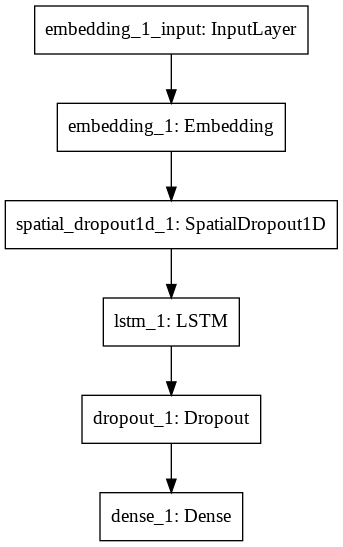

In [163]:
from tensorflow.keras.utils import plot_model
plot_model (Model , to_file='model.png')

In [172]:
history = Model.fit(paded_sequences,sentiment_clean[0],validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
625/625 [==============================] - 217s 348ms/step - loss: 0.2997 - accuracy: 0.8778 - val_loss: 0.4038 - val_accuracy: 0.8457
Epoch 2/5
625/625 [==============================] - 216s 346ms/step - loss: 0.2694 - accuracy: 0.8920 - val_loss: 0.2762 - val_accuracy: 0.8848
Epoch 3/5
625/625 [==============================] - 213s 341ms/step - loss: 0.2537 - accuracy: 0.8996 - val_loss: 0.2837 - val_accuracy: 0.8847
Epoch 4/5
625/625 [==============================] - 213s 341ms/step - loss: 0.2403 - accuracy: 0.9046 - val_loss: 0.2888 - val_accuracy: 0.8838
Epoch 5/5
625/625 [==============================] - 212s 340ms/step - loss: 0.2321 - accuracy: 0.9072 - val_loss: 0.3051 - val_accuracy: 0.8836


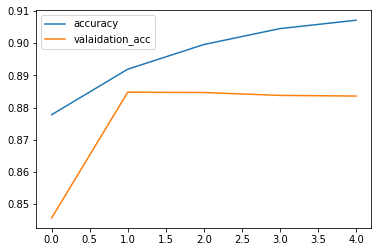

In [173]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='valaidation_acc')
plt.legend()
plt.show()

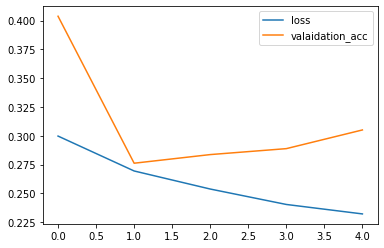

In [174]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='valaidation_acc')
plt.legend()
plt.show()

In [183]:
Test ="‎We had fun at the beginning of the movie and it was very interesting, but when the hero was killed, the movie became naive."
tw = tokenizer.texts_to_sequences([Test])
tw

[[66,
  245,
  30,
  1,
  453,
  4,
  1,
  17,
  2,
  9,
  13,
  52,
  218,
  18,
  50,
  1,
  620,
  13,
  531,
  1,
  17,
  901,
  2540]]

In [184]:
tw = pad_sequences(tw,maxlen=200)
tw

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [185]:
prediction = int(Model.predict(tw).round().item())


In [186]:
sentiment_clean[1][prediction]

'negative'